In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

# Study of Pressure Distribution on NACA 4415 Airfoil due to External flap.

### Introduction

From Wright brothers first flight to Modern planes, Aircraft design has taken huge steps in advancement. Yet, all modern planes 
use the same basic wing design when it comes to providing lift and maneuverability. 
Basically, The shape of an airfoil is rounded on the top and flat at the bottom. when the air passes over the wing the air accelarates creting an area of low pressure. This low pressure creates a lift for a flight to take off.



Lift generated by wing depends on the shape of an airfoil, wing are and velocity. During takeoff and landing the velocity of airplanes is low. 
#### so,how to increase the velocity?
To increase the velocity, the area of wing is increased and shape of the airfoil is also altered by adding some moving parts are attatched at the leading and tailing edges of the wing.
The moving part at the leading edge is a Slat and the one at the tailing edge is a Flap.  



#### What flaps do?
They play a major role during take off and while landing.

Take off:
On extending the flap partially, the camber of the wing increases and this rises the maximum lift coeficient a wing can generate. This allows the aircraft to generate lift at a lower speed, reduce stailing speeds. 

###### Time to Land.

Landing:
similarly on extending the flap fully, high lift and drag is produced. This allows steeper and slower approach to landing site.   


#### Types of Flaps:
There are different types flaps:
Plain Flap,
Split flap,
Slotted flap
Fowler flap
Funkers flap
Gouge flap
Fairey- Youngman flap
Zap flap
Krueger flap
Gurney flap


### Flap considered for this study : Junkers Flap

Junkers flap:
It is invented Germany in 1920s by O.Mader Junkers. The flap was designed to decrease take off and landing distance, as well as increase roll responsiveness in flight.

###### Junkers operation
It is a slotted plain flap, fixed below the trailing edge of the wing.So, the gap between the airfoil and flap allows airflow to pass between the wing and flap. Due to this increase in airflow, there is a significant increase in lift even at slow speeds.



##### Time to start the Simulations
To begin, Lets import two NACA 4415airfoil geometry from Airfoil Tools. 
one for Main airfoil and the other one for Flap foil.


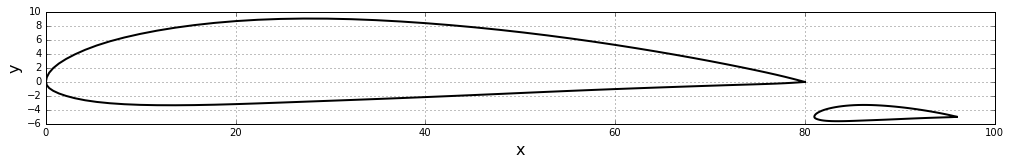

In [2]:
# reads of the geometry from a data file
with open ('naca4415-il.csv') as file_name:
    x_ends, y_ends = numpy.loadtxt(file_name, dtype=float, delimiter=',', unpack=True)
    

with open ('naca4415flap-il (1).csv') as file_name:
    xf, yf = numpy.loadtxt(file_name, dtype=float, delimiter=',', unpack=True)
    xf = xf + 81
    yf = yf - 5
    
# plots the geometry
%matplotlib inline
#size = 1
pyplot.figure(figsize=(17,2))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_ends, y_ends, xf, yf, color='k', linestyle='-', linewidth=2);

Got our NACA 4415 Airfoil and Flap geomentry!


### Discretization Airfoils into panels

The whole geomentry is discretized into panels. Each panels is defined by start and 

In [3]:
class Panel:
    """Contains information related to a panel."""
    def __init__(self, xa, ya, xb, yb):
        """Initializes the panel.
        
        Arguments
        ---------
        xa, ya -- coordinates of the first end-point of the panel.
        xb, yb -- coordinates of the second end-point of the panel.
        """
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2            # collocation point (center-point)
        self.length = math.sqrt((xb-xa)**2+(yb-ya)**2)     # length of the panel
        
        # orientation of the panel (angle between x-axis and panel's normal)
        if xb-xa <= 0.:
            self.beta = math.acos((yb-ya)/self.length)
        elif xb-xa > 0.:
            self.beta = math.pi + math.acos(-(yb-ya)/self.length)
        
        self.n = [ math.cos(self.beta), math.sin(self.beta)]
        self.t = [-math.sin(self.beta), math.cos(self.beta)]
        
        self.kappa = 1                              # doublet strength
        self.vt = 0                                 # tangential velocity
        self.cp = 0                                 # pressure coefficient

In [4]:

# plot NACA 2510 airfoil
N_panels = 96                                      # number of panels desired
x_ends = numpy.delete(x_ends,[1,N_panels-1])       # delete 2nd and 2nd to last points to merge panels
y_ends = numpy.delete(y_ends,[1,N_panels-1])
N_panels = N_panels - 2
# define the panels
panels = numpy.empty(N_panels+1, dtype=object)
for i in range(N_panels):
    panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])
panels[-1] = Panel(x_ends[0], y_ends[0], x_ends[0]+1000, y_ends[0])


In [5]:

Nfpanels = 96                              # number of panels desired

xf = numpy.delete(xf,[1,Nfpanels-1])       # delete 2nd and 2nd to last points to merge panels
yf = numpy.delete(yf,[1,Nfpanels-1])
Nfpanels = Nfpanels - 2

# define the panels
panelsf = numpy.empty(Nfpanels+1, dtype=object)
for i in range(Nfpanels):
    panelsf[i] = Panel(xf[i], yf[i], xf[i+1], yf[i+1])
panelsf[-1] = Panel(xf[0], yf[0], xf[0]+1000, yf[0])


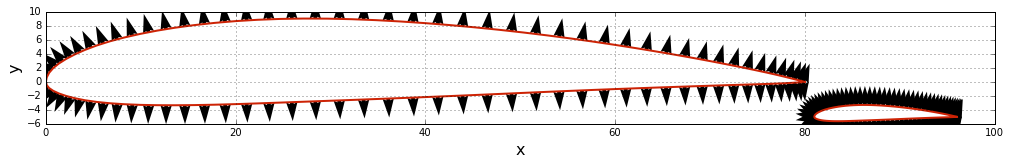

In [6]:


# plot the panels
#size = 6
pyplot.figure(figsize=(17,2))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_ends, y_ends, color='#CD2305', linestyle='-', linewidth=2)
#pyplot.scatter([p.xa for p in panels], [p.ya for p in panels], color='#CD2305', s=40)
#pyplot.scatter([p.xc for p in panels], [p.yc for p in panels], color='k', marker='x', s=40, zorder=3)
pyplot.quiver([p.xc for p in panels], [p.yc for p in panels], [p.n[0] for p in panels], [p.n[1] for p in panels],
              scale=50, width=0.005)

pyplot.plot(xf, yf, color='#CD2305', linestyle='-', linewidth=2)
#pyplot.scatter([p.xa for p in panelsf], [p.ya for p in panelsf], color='#CD2305', s=40)#pyplot.scatter([p.xc for p in panelsf], [p.yc for p in panelsf], color='k', marker='x', s=40, zorder=3)
pyplot.quiver([p.xc for p in panelsf], [p.yc for p in panelsf], [p.n[0] for p in panelsf], [p.n[1] for p in panelsf],
              scale=50, width=0.005)

pyplot.xlim(0,100)
pyplot.ylim(-6,10);



In [7]:
Uinf = 1.0                         # free-stream velocity
alpha = 2.0*math.pi/180            # angle of attack

In [8]:
def get_doublet_panel_velocity(p,x,y):
    """Evaluates the velocity components induced at coordinates (x,y) by a panel p.
    
    Arguments
    ---------
    p -- panel from which the velocity is induced
    x -- x-coordinate in global frame
    y -- y-coordinate in global frame
    
    Returns
    -------
    (u,v)-components of velocity at (x,y)
    """
    
    x_p =  math.sin(p.beta)*(x-p.xb) - math.cos(p.beta)*(y-p.yb)
    y_p =  math.cos(p.beta)*(x-p.xb) + math.sin(p.beta)*(y-p.yb)
    
    u_p = -p.kappa/(2*math.pi)*(y_p/(x_p**2+y_p**2) - y_p/((x_p-p.length)**2+y_p**2))
    v_p =  p.kappa/(2*math.pi)*(x_p/(x_p**2+y_p**2) - (x_p-p.length)/((x_p-p.length)**2+y_p**2))
    
    u =  math.sin(p.beta)*u_p + math.cos(p.beta)*v_p
    v = -math.cos(p.beta)*u_p + math.sin(p.beta)*v_p
    
    return u, v

In [9]:
Nt = numpy.concatenate((panels,panelsf))
No = 2*(N_panels+1)
#No = N_panels+1

In [10]:
# compute the influence coefficient matrix
A = numpy.zeros((No, No), dtype=float)
for i, p_i in enumerate(Nt[0:No]):
    for j, p_j in enumerate(Nt):
        A[i,j] = numpy.dot(get_doublet_panel_velocity(p_j, p_i.xc, p_i.yc), p_i.n)
        if i == j:
            A[i,j] *= 1.001
    
A[-1,:] = 0
A[-1,N_panels+1] = -1
A[-1,-2] = 1
A[-1,-1] = -1
A[N_panels,:] = 0
A[N_panels,0] = -1
A[N_panels,N_panels-1] = 1
A[N_panels,N_panels] = -1

# compute the RHS of the linear system
b = numpy.zeros((No, 1), dtype=float)
for i, p_i in enumerate(Nt[0:No]):
    b[i] = -numpy.dot(numpy.array([Uinf*math.cos(alpha), Uinf*math.sin(alpha)]), p_i.n)
        
b[N_panels,:] = 0
b[-1,:] = 0


In [11]:
# solves the linear system
kappa = numpy.linalg.solve(A, b)

km = kappa [:N_panels+1]
for i, panel in enumerate(panels):
    panel.kappa = float(km[i])
    
kf = kappa [Nfpanels:]
for i, panel in enumerate(panelsf):
    panel.kappa = float(kf[i])

In [12]:
for i, p_i in enumerate(panels[0:N_panels]):
    vt = numpy.array([0])
    for j, p_j in enumerate(Nt):
        if i != j:
            vt = vt + numpy.dot(get_doublet_panel_velocity(p_j, p_i.xc, p_i.yc), p_i.t)
    if i == 0:
        R = math.sqrt((panels[1].xc-panels[0].xc)**2 + (panels[1].yc-panels[0].yc)**2)
        vt = vt - 0.5*(panels[1].kappa-panels[0].kappa)/R
    elif i == N_panels-1:
        R = math.sqrt((panels[N_panels-1].xc-panels[N_panels-2].xc)**2 + (panels[N_panels-1].yc-panels[N_panels-2].yc)**2)
        vt = vt - 0.5*(panels[N_panels-1].kappa-panels[N_panels-2].kappa)/R
    else:
        R = math.sqrt((panels[i+1].xc-panels[i-1].xc)**2 + (panels[i+1].yc-panels[i-1].yc)**2)
        vt = vt - 0.5*(panels[i+1].kappa-panels[i-1].kappa)/R
    vt = vt + numpy.dot(numpy.array([Uinf*math.cos(alpha), Uinf*math.sin(alpha)]), p_i.t)
    p_i.vt = float(vt)
    p_i.cp = 1.0 - (p_i.vt/Uinf)**2

In [13]:

for i, p_i in enumerate(panelsf[0:Nfpanels]):
    vtf = numpy.array([0])
    for j, p_j in enumerate(Nt):
        if i != j:
            vtf = vtf + numpy.dot(get_doublet_panel_velocity(p_j, p_i.xc, p_i.yc), p_i.t)
    if i == 0:
        R = math.sqrt((panelsf[1].xc-panelsf[0].xc)**2 + (panelsf[1].yc-panelsf[0].yc)**2)
        vtf = vtf - 0.5*(panelsf[1].kappa-panelsf[0].kappa)/R
    elif i == Nfpanels-1:
        R = math.sqrt((panelsf[Nfpanels-1].xc-panelsf[Nfpanels-2].xc)**2 + (panelsf[Nfpanels-1].yc-panelsf[Nfpanels-2].yc)**2)
        vtf = vtf - 0.5*(panelsf[Nfpanels-1].kappa-panelsf[Nfpanels-2].kappa)/R
    else:
        R = math.sqrt((panelsf[i+1].xc-panelsf[i-1].xc)**2 + (panelsf[i+1].yc-panelsf[i-1].yc)**2)
        vtf = vtf - 0.5*(panelsf[i+1].kappa-panelsf[i-1].kappa)/R
    vtf = vtf + numpy.dot(numpy.array([Uinf*math.cos(alpha), Uinf*math.sin(alpha)]), p_i.t)
    p_i.vt = float(vtf)
    p_i.cp = 1.0 - (p_i.vt/Uinf)**2



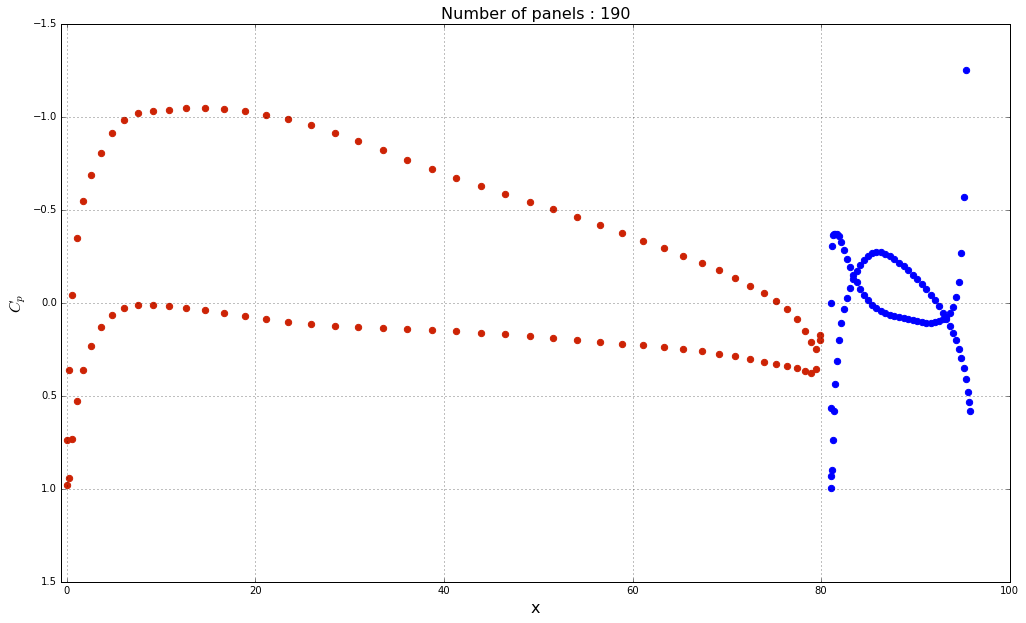

In [14]:
# plots the surface pressure coefficient
pyplot.figure(figsize=(17,10))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.scatter([p.xc for p in panels[0:N_panels]], [p.cp for p in panels[0:N_panels]], color='#CD2305', s=40, zorder=2)
pyplot.scatter([p.xc for p in panelsf[0:Nfpanels]], [p.cp for p in panelsf[0:Nfpanels]], color='b', s=40, zorder=2)

pyplot.title('Number of panels : %d' % No, fontsize=16)
pyplot.xlim(-0.6, 100)
pyplot.ylim(-1.5, 1.5)
pyplot.gca().invert_yaxis();